In [1]:
import pandas
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import numpy as np
from praveganb.idracdemo import *
import seaborn as sns
%matplotlib inline

# Setup our grpc Pipeline with the Following Params:
- Scope
- Stream
- Grpc hostname

In [4]:
idracdata = IdracData(scope='idracdemo', stream='idracdata', gateway='pravega-grpc-gateway:80')

# Read historical data from Pravega Stream

In [3]:
# pandas.set_option("display.max_rows", None)
%store -r stream_start
%store -r stream_end
reports = []
read_events = idracdata.get_data_from_idrac_generator_bymetric_id(from_stream_cut=stream_start,
                                        data_id='CUPS',
                                        rack_label='anchorsteam',
                                        metric_id='MemoryUsage')
for _report in read_events:
    reports.append(_report)

KeyboardInterrupt: 

# Collect data points of memory usage

In [6]:
display(pandas.DataFrame.from_dict(reports, orient='columns').tail())

Timestamp     RemoteAddr    Id     MetricId        avg
226  2020-04-24T22:00:30.314Z  10.243.19.152  CUPS  MemoryUsage  10.833333
227  2020-04-24T22:00:40.255Z  10.243.19.158  CUPS  MemoryUsage   4.500000
228  2020-04-24T21:54:59.222Z  10.243.19.153  CUPS  MemoryUsage  14.333333
229  2020-04-24T22:01:30.540Z  10.243.19.152  CUPS  MemoryUsage   9.666667
230  2020-04-24T22:01:40.288Z  10.243.19.158  CUPS  MemoryUsage   4.583333

# Calculate the Standard of deviation, mean, and sum

In [7]:
stdv, mean, count , s1, s2 = calculate_stdv(reports)
stdv, mean, count

(5.5381339110681385, 10.51479076479076, 231)

# Plot the histogram and KDE 

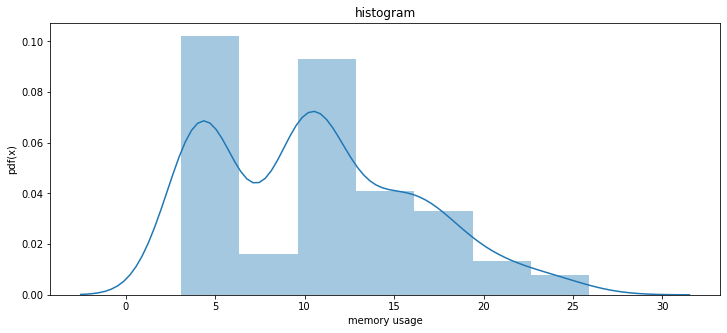

In [8]:
xs = [i['avg'] for i in reports ]
f, ax1 = plt.subplots(figsize=(12, 5),
                       sharey=True)
ax1.set_title('histogram')
ax1.set_xlabel('memory usage')
ax1.set_ylabel('pdf(x)')
sns.distplot(xs, ax=ax1, hist=True)

# Now we can predict extensive memory bandwidth utilization

In [9]:
usage = 50
grsf = norm.sf(x=usage, loc=mean, scale=stdv)
grsf

5.029555167965818e-13

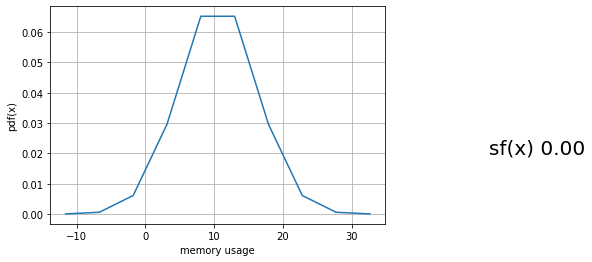

In [10]:
fig, ax = plt.subplots()
x = np.linspace(mean-4*stdv,mean+4*stdv, int(mean))
p = norm.pdf(x, scale=stdv, loc=mean) 
ax.plot(x, norm.pdf(x, scale=stdv, loc=mean), label='stdv=%.1f' % stdv)
ax.set_xlabel('memory usage')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(usage, mean+4*stdv, 0.01)
ax.fill_between(px,norm.pdf(px,scale=stdv, loc=mean),alpha=0.5, color='r')
ax.text(usage,0.02,"sf(x) %.2f" %(grsf), fontsize=20)
plt.show()

# The above graph is the same as 1−𝑃

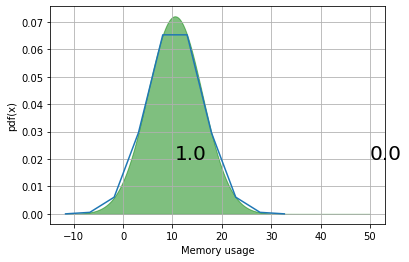

In [11]:
gr=1-grsf
fig, ax = plt.subplots()
x = np.linspace(mean-4*stdv,mean+4*stdv, int(mean))
p = norm.pdf(x, scale=stdv, loc=mean)
ax.plot(x, p)
ax.set_xlabel('Memory usage')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(usage, mean+4*stdv, 0.01)
ax.fill_between(px,norm.pdf(px,scale=stdv, loc=mean),alpha=0.5, color='r')
px1=np.arange(mean-4*stdv, usage, 0.01)
ax.fill_between(px1,norm.pdf(px1,scale=stdv, loc=mean),alpha=0.5, color='g')
ax.text(mean,0.02,round(gr,2), fontsize=20)
ax.text(usage, 0.02,round(grsf,2), fontsize=20)
plt.show()